In [1]:
#First, we need to import some basic libraries.
import numpy as np
import pandas as pd 
#!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Now, we read the data. 
df1= pd.read_csv("archive/Cheapestelectriccars-EVDatabase.csv")
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [11]:
#filling empty data with 0
#There are a lot of missing values in the data, so now let us fill the missing data with zero initially.

df1=df1.fillna('0')
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",0
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,0,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,0,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [12]:
#Now, let us get the name of the car manufacturer from the car name.
df1['Manufacturer'] = df1.Name.str.split(' ', 1, expand=True)[0]
#cleaning the data
#removing currency sign
PriceinUK=[]
for item in df1['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df1['PriceinUK']=PriceinUK

In [13]:
PriceinGermany=[]
for item in df1['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df1['PriceinGermany']=PriceinGermany

In [14]:
FastChargeSpeed=[]
for item in df1['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df1['FastChargeSpeed']=FastChargeSpeed
#These types of data cleaning and data preparation methods are unique and different for various different types of data. Next, we proceed to prepare the data for efficiency.

Efficiency=[]
for item in df1['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df1['Efficiency']=Efficiency


In [7]:
Range=[]
for item in df1['Range']:
    Range+=[int(item.replace(' km',''))]
df1['Range']=Range
TopSpeed=[]
for item in df1['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df1['TopSpeed']=TopSpeed
Acceleration=[]
for item in df1['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df1['Acceleration']=Acceleration
Subtitle=[]
for item in df1['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df1['Subtitle']=Subtitle

df1= df1.rename(columns = {'Subtitle':'KWH'})
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    int64 
 6   FastChargeSpeed  180 non-null    int64 
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   180 non-null    int64 
 10  PriceinUK        180 non-null    int64 
 11  Manufacturer     180 non-null    object
dtypes: int64(5), object(7)
memory usage: 17.0+ KB


In [9]:
df1.corr()

,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
Efficiency,1.000000,-0.059914,0.602469,0.239221,0.084527
FastChargeSpeed,-0.059914,1.000000,-0.119644,0.595609,0.650851
NumberofSeats,0.602469,-0.119644,1.000000,-0.012455,-0.211985
PriceinGermany,0.239221,0.595609,-0.012455,1.000000,0.698753
PriceinUK,0.084527,0.650851,-0.211985,0.698753,1.000000


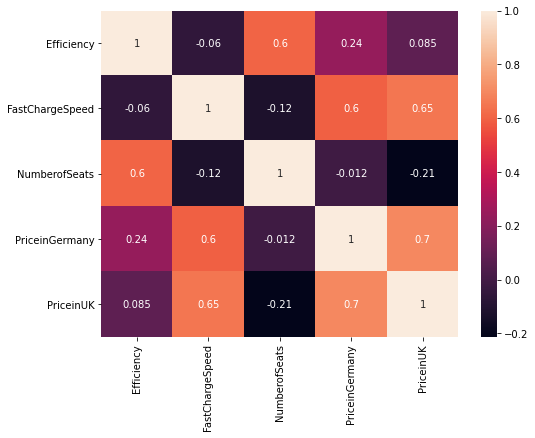

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True)

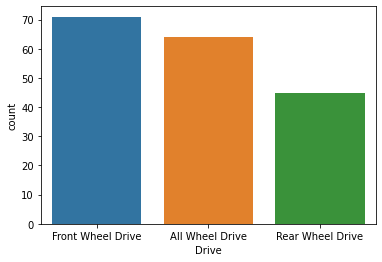

In [50]:
sns.countplot(x = 'Drive', data = df1)

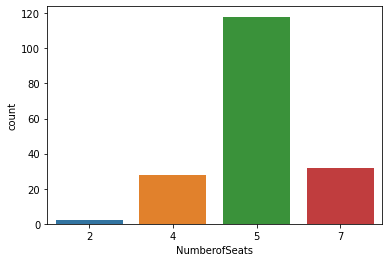

In [51]:
sns.countplot(x = 'NumberofSeats', data = df1)

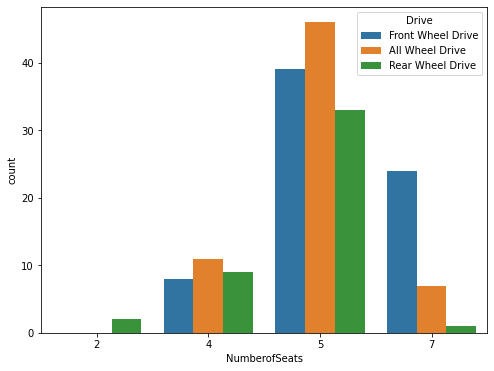

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df1)

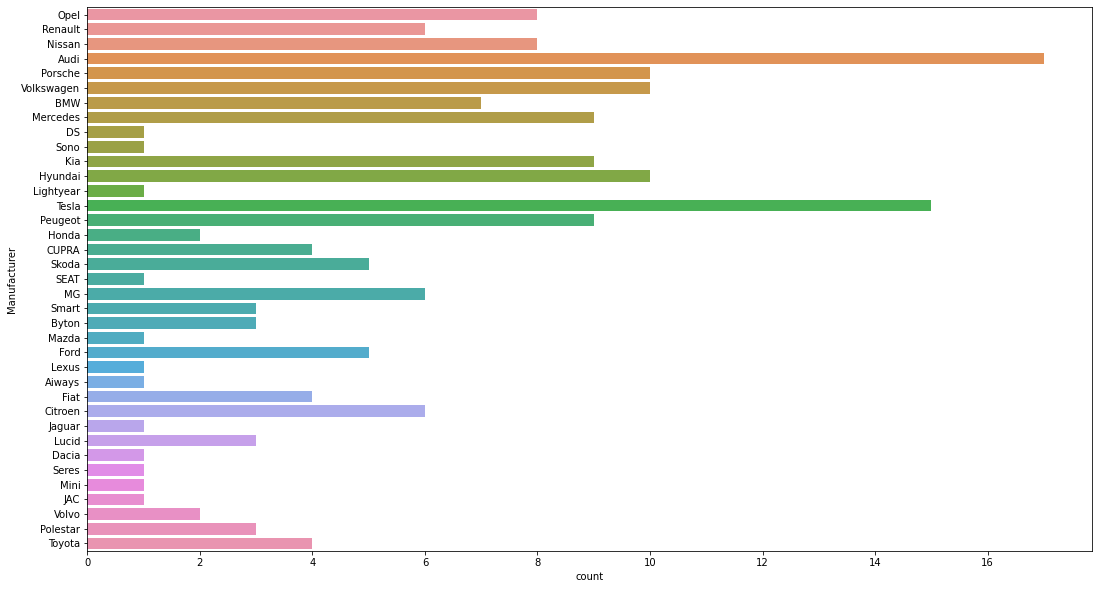

In [53]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df1)

In [55]:
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df1)

ValueError: Could not interpret input 'KWH'

In [56]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=6,sizes=(15, 100),data=df1)

ValueError: Could not interpret input 'KWH'

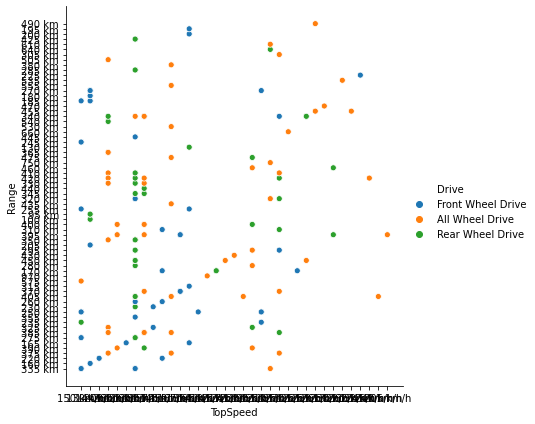

In [57]:
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df1)

In [58]:
sns.jointplot(x=df1["KWH"], y=df1["Range"], kind="hex", color="#4CB391")

KeyError: 'KWH'

In [59]:
sns.jointplot(x=df1["KWH"], y=df1["Efficiency"], kind="hex", color="#4CB391")

KeyError: 'KWH'

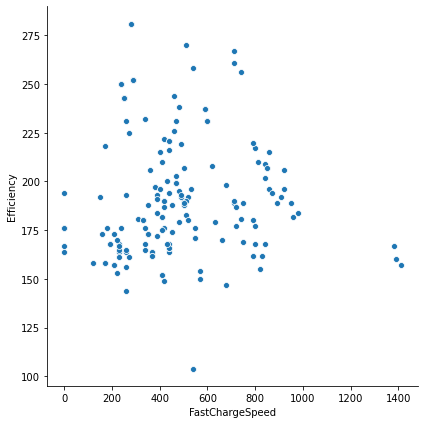

In [60]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=df1)

In [61]:
c=0
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        c+=1
print('Empty Values:',c)

Empty Values: 44


In [62]:
pd.options.mode.chained_assignment = None

In [63]:
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        val=df1["PriceinGermany"][i]*0.85
        df1["PriceinUK"][i]=val

In [64]:
#!pip install scikit-learn
#!pip install category_encoders
#!conda install -c conda-forge category_encoders
#!pip install --upgrade git+https://github.com/scikit-learn-contrib/category_encoders
#from category_encoders import *
!pip install --upgrade category_encoders
import category_encoders as ce

train_df=df1
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])
#fit and transform train data 
df_train = encoder.fit_transform(train_df)#Original data


ModuleNotFoundError: No module named 'category_encoders'

In [35]:
df_train.info()

NameError: name 'df_train' is not defined